___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Principal Component Analysis

PCA is an unsupervised statistical technique used to examine the interrelations among a set of variables in order to identify the underlying structure of those variables (sometimes known as general factor analysis). 
- the point is to reduce the dimensionality of the dataset while retaining as much information (variance) as possible
- this is useful in processing and analyzing large datasets where numerous variables may contribute to the result

- For more on the math side, read: Introduction to Statistical Leanring Section 10.2 for PCA - Gareth James

Where a regression determines a line of best fit to a dataset, PCA (factor analysis) determines several orthongol lines of best fit to the dataset 
- Orthogonal meaning "at right angles"
    - the lines are perpendicular to each other in n-dimensional space (sample space)
- n-Dimensional Space is the variable sample size
    - there are as many dimensions as there are variables so in a dataset with 4 variables, the sample space is 4-dimensional

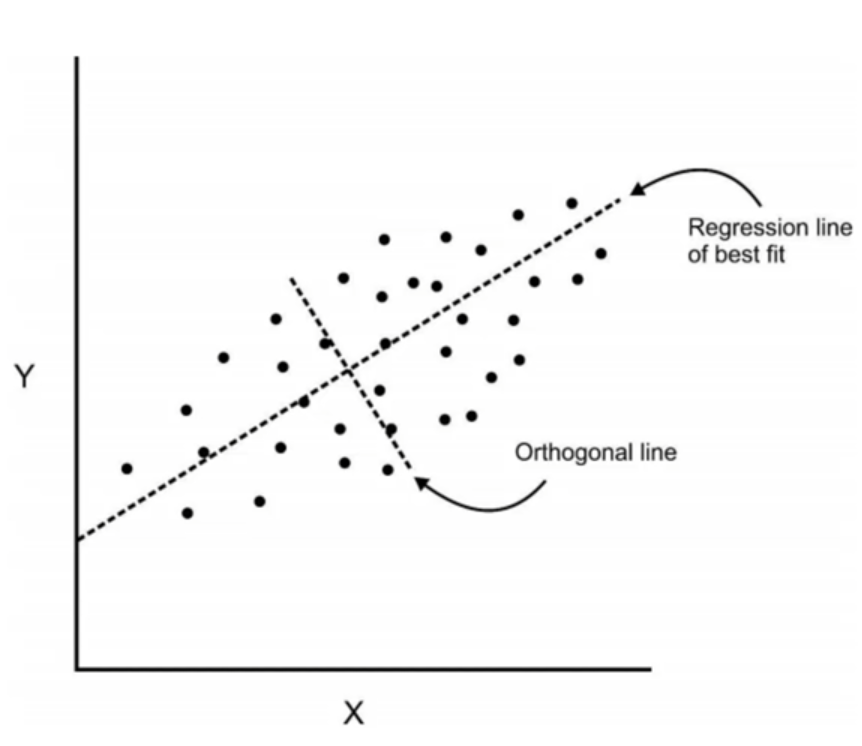


## Components of Dataset
Components are linear transformation that chooses a variable system for the data set such that the greatest variance of the dataset comes to lie on the first axis, and then the second greatest variance on the second axis, and so on...

This process allows us to reduce the number of variables used in an analysis. 

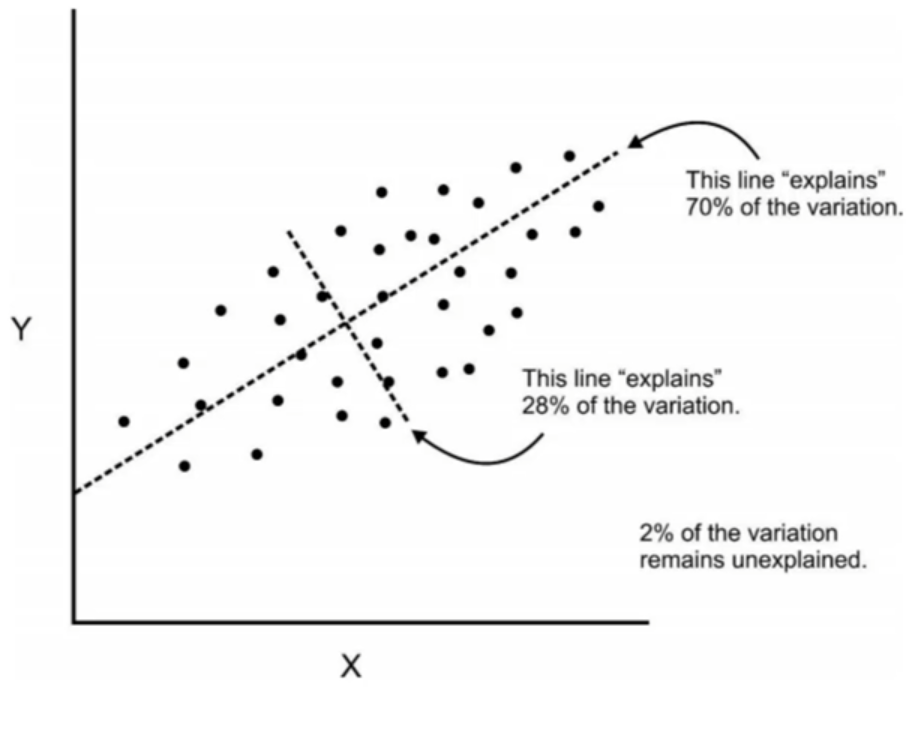

The first principal line explains 70% of the variation, the orthogonal line is 28% of the variation, and 2% of the variation remains unexplained. Components are uncorrelated since in the sample space, they are orthogonal to each other. 

You can continue this analysis into higher dimensions: 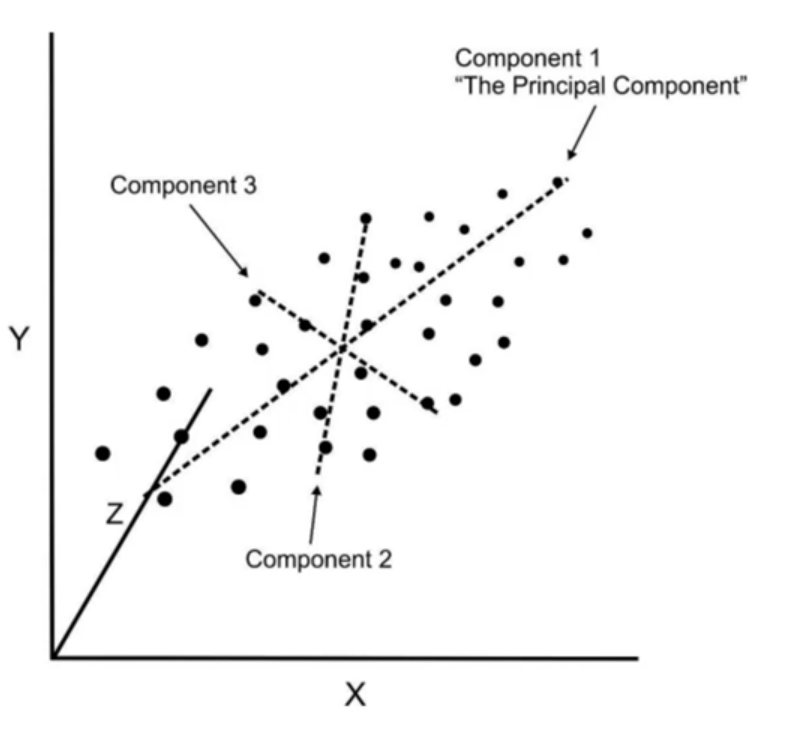

We have 3 components in the z-th dimension. If we use this technique on a data set with a large number of variables, we can compress the amount of explained variation to just a few components. The most challenging part of PCA is interpreting the components. 
- we usually want to standardize our data by some scale for PCA
- the algorithm is used usually for analysis of data and not fully deployable model 


PCA is just a transformation of your data and attempts to find out what features explain the most variance in your data. For example:

<img src='PCA.png' />

## How does PCA work (start to finish)?
1. Standardization 

If the data features has different units (dollars, pounts, meters, etc.), we need to standardize them. PCA is sensitive to the variances of the initial variables. If one variable varies widely and another has a small range PCA will be biased toward the variable with the larger range. Standardization transforms your data so that each feature has a mean of 0 and standard deviation of 1. 

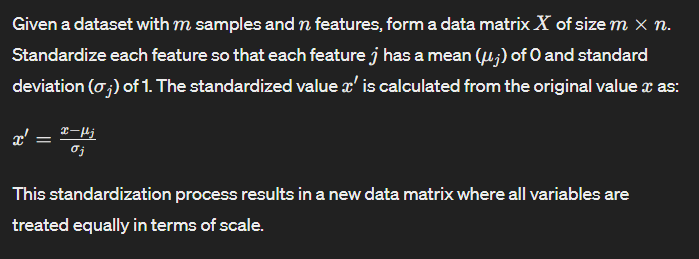

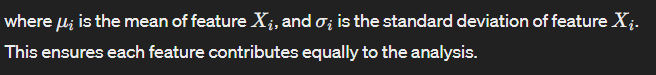

2. Covariance Matrix Computation

PCA computes the covariance matrix of the data. The covariance matrix captures how each variable relates to every other variable in the dataset. In simpler terms, it helps us understand which variables change together. If two variables increase together (positive covariance), or one increases when other decreases (negative covariance), this relationship is captured in the covariance matrix

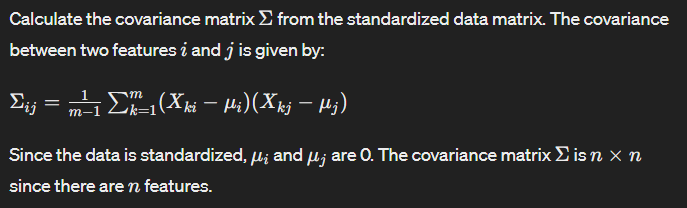

Covariance Matrix looks like:

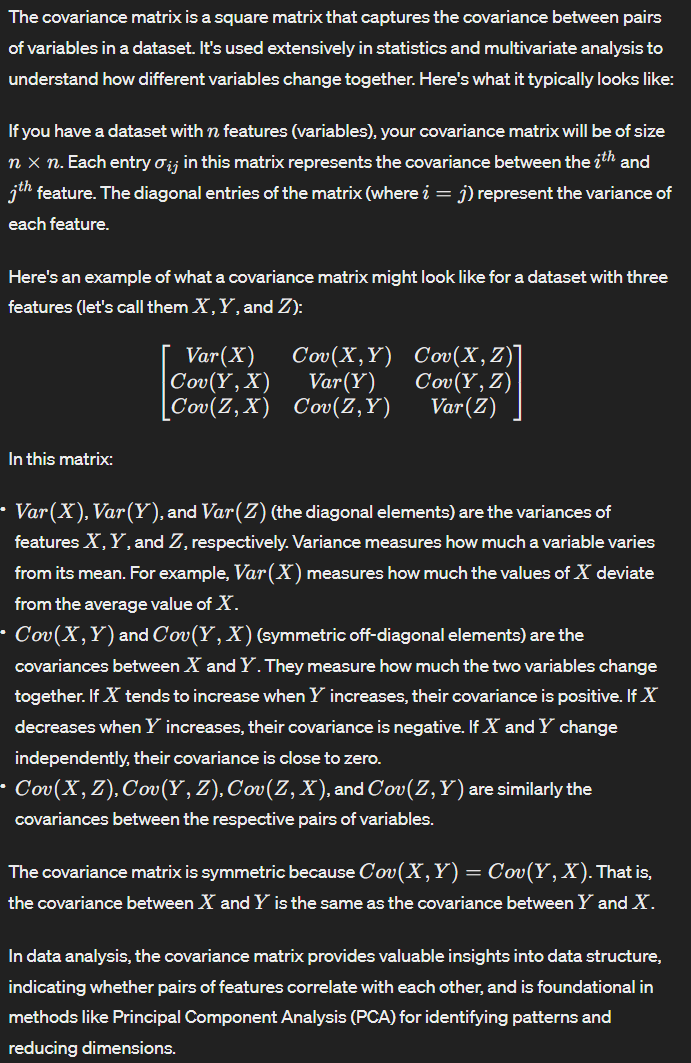

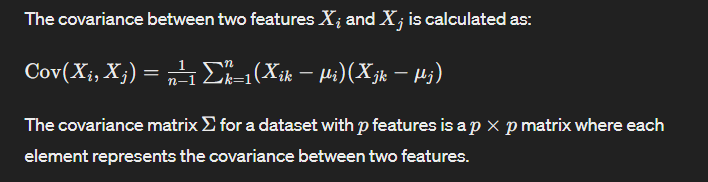


3. Eigendecomposition

The covariance matrix is decomposed into its eigenvectors and eigenvalues. 

`Eigenvalues` tell us the variance (the amount of information captured by each principal component. Higher eigenvalues correspond to dimensions with more variance. 

`Eigenvectors` point in a direction of maximum variance and define the principal components. They are perpendicular (orthogonal) to each other in the feature space

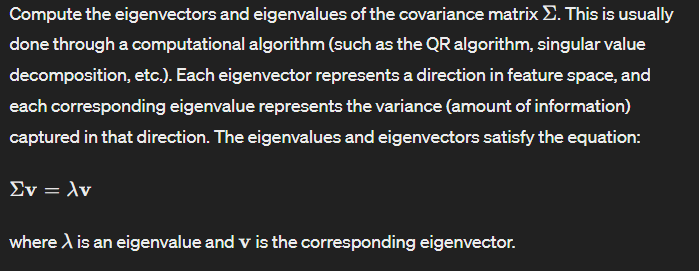

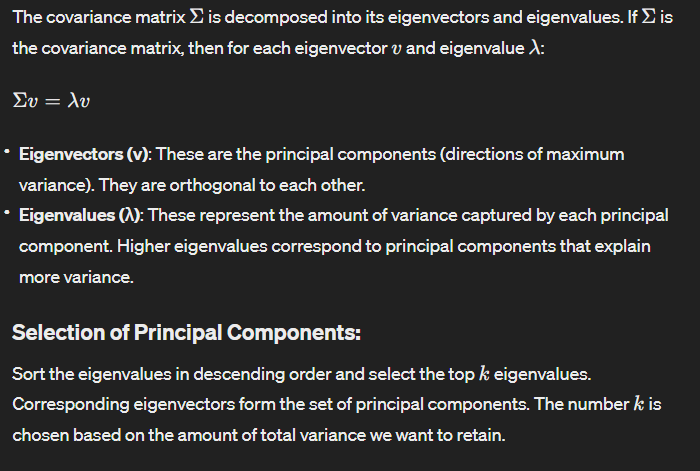

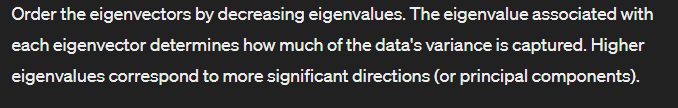

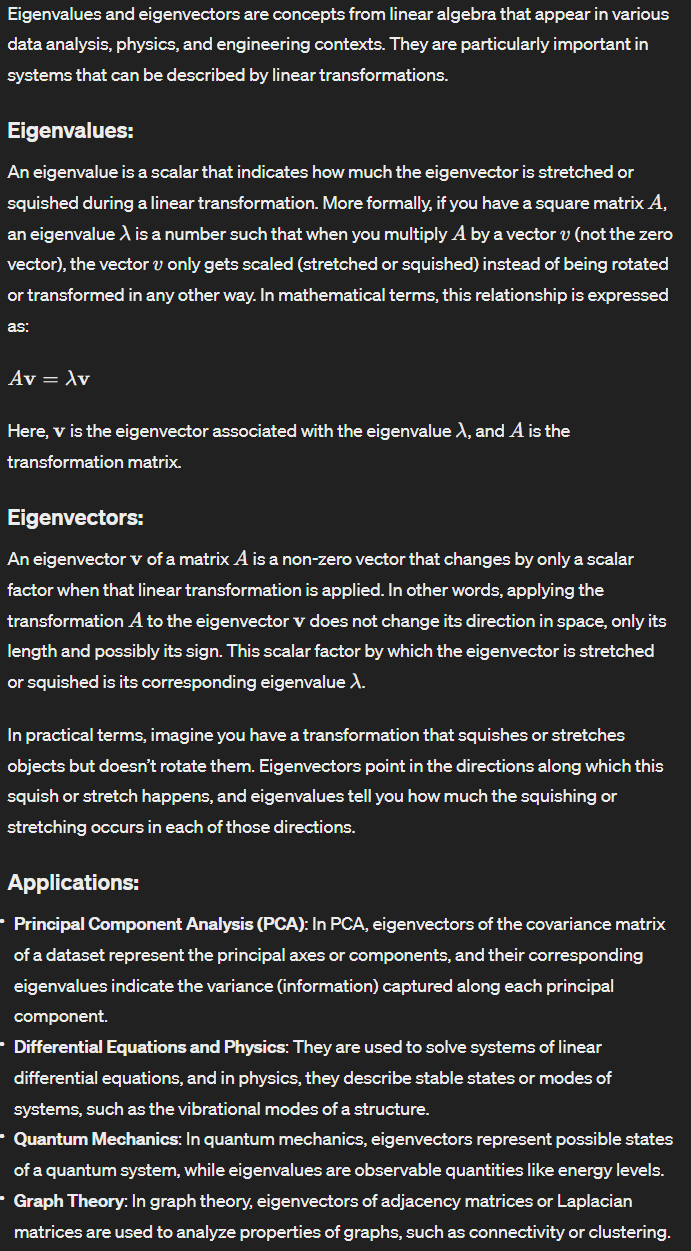

4. Select Principal Components

Principal components are teh new set of variables that are obtained from the initial variables. They are ordered by the amount of original variance they capture from the data. The first principal component captures the most variance, the second captures the second most, etc. You usually select a subset of the principal components that capture the most signficiant variance (and hence, most essential of the information) while ignoring the ones with lower variance (which likely correspond to noise or less important information). 

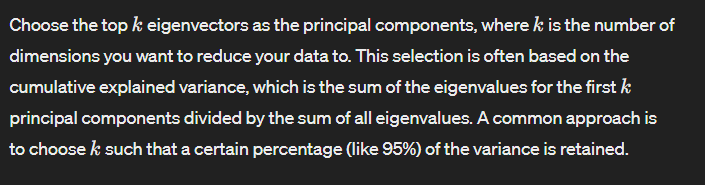


5. Transform the Data

Finally, we transform the original data into new subspace created by the selected principal components. This results in a new dataset of fewer dimensions (if you selected fewer principal components than original variables) where the variables are uncorrelated. This transformed dataset can then be used for further analysis, visualization, or as input to other ML algorithms. 

For Example: 
Imagine you have a dataset of fruits characterized by features like weight, sweetness, color, and price. If weight and price are highly correlated (fruits that weigh more tend cost more $), PCA can help reduce these four dimensions into fewer composite indices (principal components) while retaining most of the information. The first principal component might represent a combination of weight & price, capturing the bulk of the variance in the data, while the second might capture variations in sweetness and color that aren't related to the first principal component. 


PCA transforms a large set of variables into a smaller one that still contains most of the information. This smaller set, the principal components, helps us understand the underlying structure of the data without much loss of information, making it easier to explore and visualize the dataset

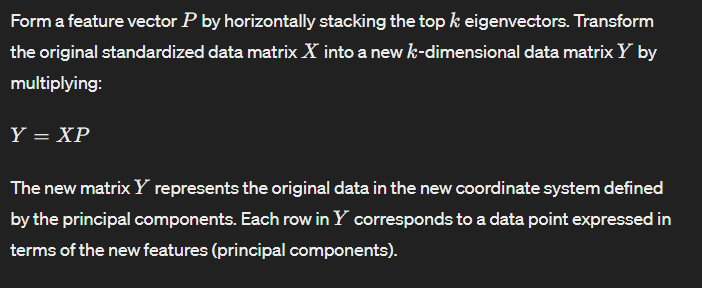



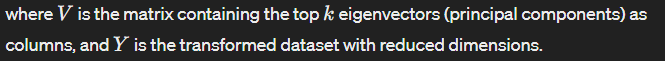

## Pros and Cons

Pros: 
- Dimensionality Reduction: PCA reduces the dimensionality of data while retaining most of the variation, which helps in simplifying the data for analysis without losing significant information.
- Noise Reduction: By retaining only significant principal components and dropping those with lower variance, PCA can help remove noise from the data.
- Feature Correlation: PCA can uncover correlated features in the dataset and represent them with fewer features (principal components), thus helping in understanding the underlying structure of the data.
- Visualization: Reducing data to two or three principal components can enable visualization in two or three dimensions, making it easier to identify patterns, clusters, and outliers.
- Efficiency: Lower-dimensional data reduces the computational cost of processing and analyzing data, making machine learning algorithms run faster.
- Preprocessing for Other Algorithms: PCA can be used as a preprocessing step to improve the performance of machine learning algorithms, especially those that are sensitive to feature scales or the curse of dimensionality (like k-NN, SVM).


Cons:
- Interpretability: Principal components are linear combinations of original features and can be difficult to interpret in terms of the original variables.
- Data Linearity: PCA assumes linearity in the data, meaning it assumes that the principal components are a linear combination of the original features. It might not capture complex, nonlinear relationships between variables effectively.
- Sensitive to Scaling: The outcome of PCA can be significantly affected by the scale of the features. If features are not standardized, PCA might be biased towards high variance features.
- Loss of Information: While reducing dimensions, some information is inevitably lost. This can be problematic if the discarded components contain important information or if too much variance (information) is lost.
- Outliers: PCA is sensitive to outliers in the data, which can distort the results. Proper data cleaning and preprocessing are necessary before applying PCA.
- Absence of Consistency: In different runs, PCA might come up with different components due to random initializations, especially in iterative implementations for large datasets.
- Not Suitable for All Data Types: PCA is most effective on numerical data. For categorical data, alternative methods like Multiple Correspondence Analysis (MCA) may be more suitable.


Its effectiveness depends on the nature and scale of the dataset, and it may require careful preprocessing. 

## Libraries

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## The Data

Let's work with the cancer data set again since it had so many features.

In [22]:
from sklearn.datasets import load_breast_cancer

In [23]:
cancer = load_breast_cancer()

In [24]:
cancer.keys()

dict_keys(['DESCR', 'data', 'feature_names', 'target_names', 'target'])

In [25]:
print(cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)
        
        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.
 

In [26]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
#(['DESCR', 'data', 'feature_names', 'target_names', 'target'])

In [27]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## PCA Visualization

As we've noticed before it is difficult to visualize high dimensional data, we can use PCA to find the first two principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Before we do this though, we'll need to scale our data so that each feature has a single unit variance.

In [30]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [33]:
scaled_data = scaler.transform(df)

PCA with Scikit Learn uses a very similar process to other preprocessing functions that come with SciKit Learn. We instantiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform().

We can also specify how many components we want to keep when creating the PCA object.

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components=2)

In [36]:
pca.fit(scaled_data)

PCA(copy=True, n_components=2, whiten=False)

Now we can transform this data to its first 2 principal components.

In [37]:
x_pca = pca.transform(scaled_data)

In [38]:
scaled_data.shape

(569, 30)

In [39]:
x_pca.shape

(569, 2)

Great! We've reduced 30 dimensions to just 2! Let's plot these two dimensions out!

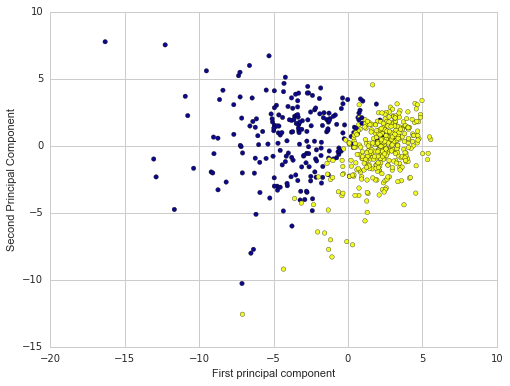

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Clearly by using these two components we can easily separate these two classes.

## Interpreting the components 

Unfortunately, with this great power of dimensionality reduction, comes the cost of being able to easily understand what these components represent.

The components correspond to combinations of the original features, the components themselves are stored as an attribute of the fitted PCA object:

In [55]:
pca.components_

array([[-0.21890244, -0.10372458, -0.22753729, -0.22099499, -0.14258969,
        -0.23928535, -0.25840048, -0.26085376, -0.13816696, -0.06436335,
        -0.20597878, -0.01742803, -0.21132592, -0.20286964, -0.01453145,
        -0.17039345, -0.15358979, -0.1834174 , -0.04249842, -0.10256832,
        -0.22799663, -0.10446933, -0.23663968, -0.22487053, -0.12795256,
        -0.21009588, -0.22876753, -0.25088597, -0.12290456, -0.13178394],
       [ 0.23385713,  0.05970609,  0.21518136,  0.23107671, -0.18611302,
        -0.15189161, -0.06016536,  0.0347675 , -0.19034877, -0.36657547,
         0.10555215, -0.08997968,  0.08945723,  0.15229263, -0.20443045,
        -0.2327159 , -0.19720728, -0.13032156, -0.183848  , -0.28009203,
         0.21986638,  0.0454673 ,  0.19987843,  0.21935186, -0.17230435,
        -0.14359317, -0.09796411,  0.00825724, -0.14188335, -0.27533947]])

In this numpy matrix array, each row represents a principal component, and each column relates back to the original features. we can visualize this relationship with a heatmap:

In [56]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

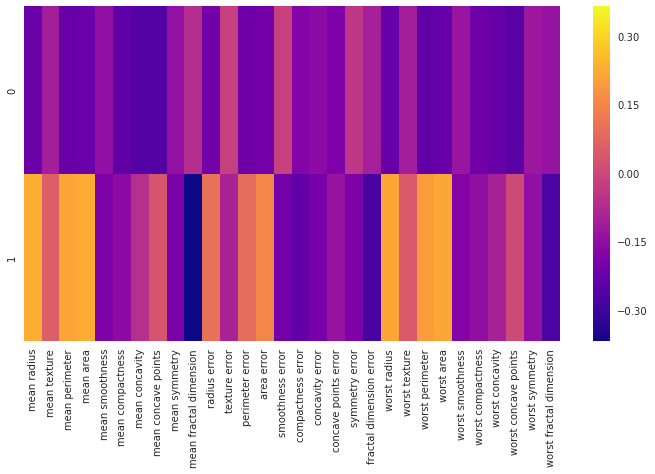

In [57]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.

## Conclusion

Hopefully this information is useful to you when dealing with high dimensional data!

# Great Job!